In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train/Test split (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train/Test split (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

# Train a Logistic Regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)
y_prob = clf.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC-AUC

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("ROC-AUC Score:", roc_auc)


Confusion Matrix:
 [[41  2]
 [ 1 70]]
Precision: 0.9722222222222222
Recall: 0.9859154929577465
ROC-AUC Score: 0.99737962659679


In [4]:
import numpy as np

# Use predicted probabilities
y_prob = clf.predict_proba(X_test_scaled)[:, 1]

# Change threshold from 0.5 to 0.3
threshold = 0.3
y_pred_thresholded = (y_prob >= threshold).astype(int)

# Evaluate with new threshold
from sklearn.metrics import classification_report

print("Classification Report (Threshold = 0.3):\n")
print(classification_report(y_test, y_pred_thresholded))


Classification Report (Threshold = 0.3):

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
model = LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

Confusion_matrix:
 [[41  2]
 [ 1 70]]
Precision: 0.9722222222222222
Recall: 0.9859154929577465
ROC_AUS_score: 0.99737962659679


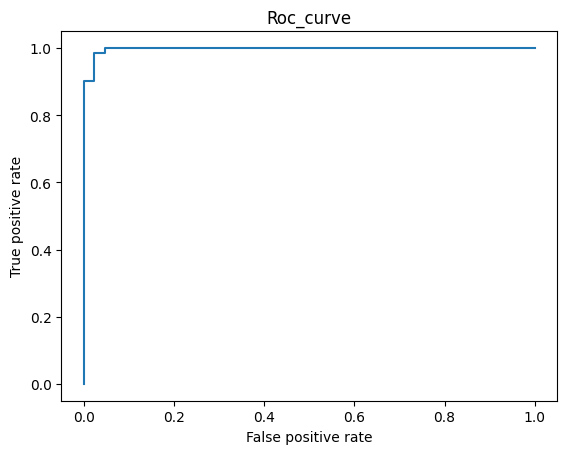

In [10]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve # Import roc_curve
import matplotlib.pyplot as plt # Import matplotlib for plotting


# ... (your existing code for data loading, preprocessing, and model training) ...


y_pred = model.predict(X_test_scaled)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion_matrix:\n", cm)

# Precision and recall
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# Roc_score
y_prob = model.predict_proba(X_test_scaled)[:, 1]
print("ROC_AUS_score:", roc_auc_score(y_test, y_prob))

# Roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_prob)  # Now roc_curve is defined
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Roc_curve')
plt.show()

In [11]:
threshold = 0.7
y_custom = (y_prob >= threshold).astype(int)

print("Custom_cunfusion_matrix:\n",confusion_matrix(y_test,y_custom))
print("Precision_score:",precision_score(y_test,y_custom))
print("Recall_score:",recall_score(y_test,y_custom))

Custom_cunfusion_matrix:
 [[42  1]
 [ 4 67]]
Precision_score: 0.9852941176470589
Recall_score: 0.9436619718309859


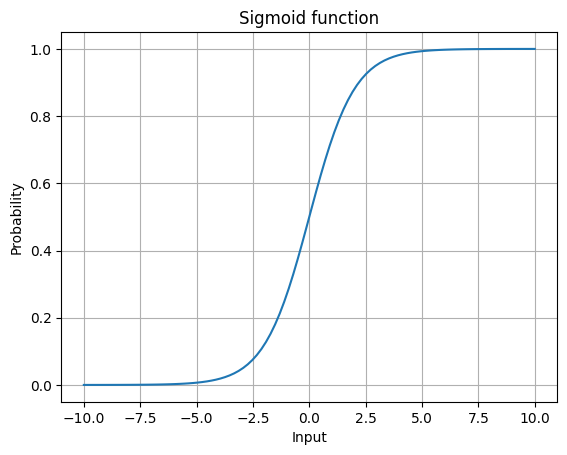

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_vals = np.linspace(-10, 10, 100)
y_vals = sigmoid(x_vals)


plt.plot(x_vals,y_vals)
plt.title("Sigmoid function")
plt.xlabel('Input')
plt.ylabel('Probability')
plt.grid(True)
plt.show()